In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cf_matrix):
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3g')

  ax.set_title('Confusion Matrix\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Failed','Passed'])
  ax.yaxis.set_ticklabels(['Failed','Passed'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
def process_data(data, headers):
    for header_idx, header in enumerate(headers):
        if header == "school":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "GP":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "sex":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "F":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "address":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "U":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "famsize":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "LE3":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "Pstatus":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "T":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "Mjob" or header == "Fjob":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "teacher":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "health":
                    data[row_idx, header_idx] = 1
                elif data[row_idx, header_idx] == "services":
                    data[row_idx, header_idx] = 2
                elif data[row_idx, header_idx] == "at_home":
                    data[row_idx, header_idx] = 3
                else:
                    data[row_idx, header_idx] = 4
        elif header == "reason":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "home":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "reputation":
                    data[row_idx, header_idx] = 1
                elif data[row_idx, header_idx] == "course":
                    data[row_idx, header_idx] = 2
                else:
                    data[row_idx, header_idx] = 3
        elif header == "guardian":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "mother":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "father":
                    data[row_idx, header_idx] = 1
                else:
                    data[row_idx, header_idx] = 2
        elif (header == "schoolsup" or header == "famsup" or header == "paid"
            or header == 'activities' or header == 'nursery' or header == 'higher'
            or header == 'higher' or header == 'internet' or header == 'romantic'):
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "yes":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif (header == "G1" or header == "G2" or header == "G3"):
          for row_idx in range(len(data[0:, header_idx])):
            data[row_idx, header_idx] = int(int(data[row_idx, header_idx]) >= 10)
    return data.astype(int)

def get_data():
    with open('/content/drive/My Drive/Colab Notebooks/proj/student-por.csv') as f:
        por_data = np.genfromtxt(f, delimiter=';', dtype='unicode')  

    for row_idx in range(len(por_data)):
        for col_idx in range(len(por_data[row_idx])):
            por_data[row_idx, col_idx] = por_data[row_idx, col_idx].strip('"')
    
    por_headers = por_data[0,:]
    por_data = por_data[1:, :]

    with open('/content/drive/My Drive/Colab Notebooks/proj/student-mat.csv') as f:
        mat_data = np.genfromtxt(f, delimiter=';', dtype='unicode')  

    for row_idx in range(len(mat_data)):
        for col_idx in range(len(mat_data[row_idx])):
            mat_data[row_idx, col_idx] = mat_data[row_idx, col_idx].strip('"')
    mat_headers = mat_data[0,:]
    mat_data = mat_data[1:, :]

    return ((mat_headers,mat_data),(por_headers,por_data))

In [9]:
# read in data from csvs
(mat_headers, mat_data), (por_headers, por_data) = get_data()

# reformat data to all integers
por_data = process_data(por_data, por_headers)
mat_data = process_data(mat_data, mat_headers)

por_x = por_data[:, :-3]
por_g1 = por_data[:, -3]
por_g2 = por_data[:, -2]
por_g3 = por_data[:, -1]

mat_x = mat_data[:, :-3]
mat_g1 = mat_data[:, -3]
mat_g2 = mat_data[:, -2]
mat_g3 = mat_data[:, -1]

In [10]:
# This function will fit and test a KNN model for 1<= num_neighbors <= num_samples and return the predictions
# and confusion matrix for the most accurate num_neighbors val
def do_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, shuffle = True, random_state=2)

    models = {}
    for i in range(len(X_train) - 1):
      model = KNeighborsClassifier(n_neighbors=i+1)
      models[i] = model.fit(X_train,y_train)

    accuracy = []
    for i in range(len(X_train) - 1):
      y_predict = models[i].predict(X_test)
      accuracy.append(accuracy_score(y_test,y_predict))

    most_accurate_idx = None
    most_accurate_accuracy = 0

    for idx, acc in enumerate(accuracy):
        if most_accurate_idx is None or most_accurate_accuracy < acc:
            most_accurate_accuracy = acc
            most_accurate_idx = idx

    pred = models[most_accurate_idx].predict(X_test)
    conf = confusion_matrix(y_test, pred)
    return pred, conf

## Portuguese KNN Classification

In [11]:
# will hold predictions and confusion matrices for all 3 grades
por_predictions = []
por_conf_mats = []

## For G1
por_g1_predict, por_g1_conf = do_knn(por_x, por_g1)
por_predictions.append(por_g1_predict)
por_conf_mats.append(por_g1_conf)

## For G2
por_g2_predict, por_g2_conf = do_knn(por_x, por_g2)
por_predictions.append(por_g2_predict)
por_conf_mats.append(por_g2_conf)

## For G3
por_g3_predict, por_g3_conf = do_knn(por_x, por_g3)
por_predictions.append(por_g3_predict)
por_conf_mats.append(por_g3_conf)


## Mathematics KNN Classification

In [12]:
# will hold predictions and confusion matrices for all 3 grades
mat_predictions = []
mat_conf_mats = []

## For G1
mat_g1_predict, mat_g1_conf = do_knn(mat_x, mat_g1)
mat_predictions.append(mat_g1_predict)
mat_conf_mats.append(mat_g1_conf)

## For G2
mat_g2_predict, mat_g2_conf = do_knn(mat_x, mat_g2)
mat_predictions.append(mat_g2_predict)
mat_conf_mats.append(mat_g2_conf)

## For G3
mat_g3_predict, mat_g3_conf = do_knn(mat_x, mat_g3)
mat_predictions.append(mat_g3_predict)
mat_conf_mats.append(mat_g3_conf)


## Portuguese KNN Analysis

Portuguese Accuracies:
	For G1: 78.97435897435898%


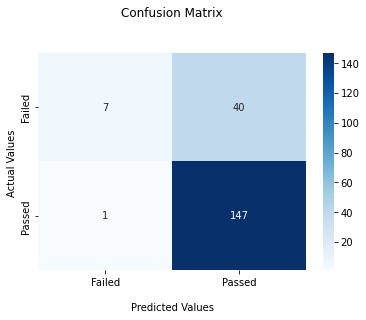

	For G2: 78.46153846153847%


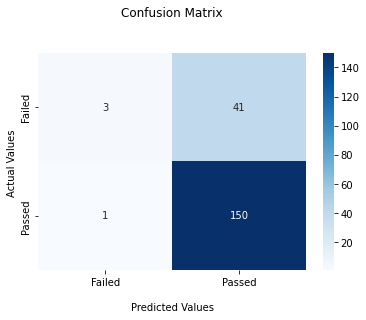

	For G3: 86.15384615384616%


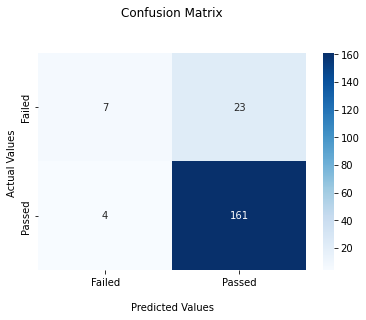

In [21]:
g1_acc = 100 * np.diag(por_conf_mats[0]).sum() / (por_conf_mats[0].sum())
g2_acc = 100 * np.diag(por_conf_mats[1]).sum() / (por_conf_mats[1].sum())
g3_acc = 100 * np.diag(por_conf_mats[2]).sum() / (por_conf_mats[2].sum())

print("Portuguese Accuracies:")
print(f"\tFor G1: {g1_acc}%")
plot_confusion_matrix(por_conf_mats[0])
print(f"\tFor G2: {g2_acc}%")
plot_confusion_matrix(por_conf_mats[1])
print(f"\tFor G3: {g3_acc}%")
plot_confusion_matrix(por_conf_mats[2])

## Mathematics KNN Analysis

Mathematics Accuracies:
	For G1: 64.70588235294117%


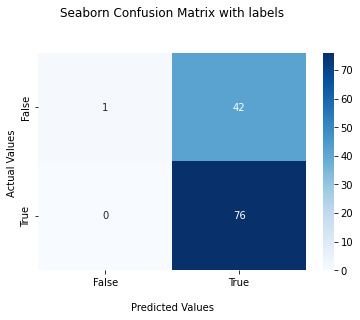

	For G2: 67.22689075630252%


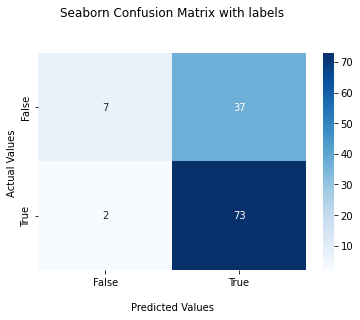

	For G3: 69.74789915966386%


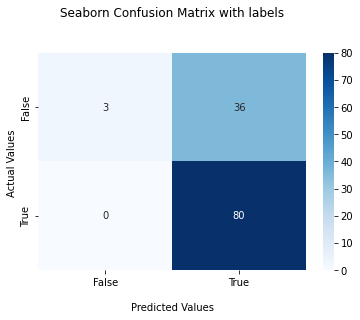

In [15]:
g1_acc = 100 * np.diag(mat_conf_mats[0]).sum() / (mat_conf_mats[0].sum())
g2_acc = 100 * np.diag(mat_conf_mats[1]).sum() / (mat_conf_mats[1].sum())
g3_acc = 100 * np.diag(mat_conf_mats[2]).sum() / (mat_conf_mats[2].sum())

print("Mathematics Accuracies:")
print(f"\tFor G1: {g1_acc}%")
plot_confusion_matrix(mat_conf_mats[0])
print(f"\tFor G2: {g2_acc}%")
plot_confusion_matrix(mat_conf_mats[1])
print(f"\tFor G3: {g3_acc}%")
plot_confusion_matrix(mat_conf_mats[2])